<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-03 00:29:01.685650


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

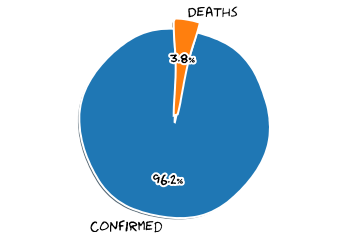

Alabama State Total Population
4887871
Alabama State Confirmed
7611 (0.15571196539352206% of population)
Alabama State Deaths
288 (3.7839968466692944% of confirmed)



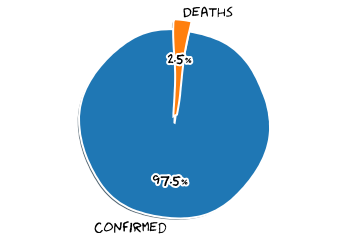

Alaska State Total Population
737438
Alaska State Confirmed
365 (0.0494956864170276% of population)
Alaska State Deaths
9 (2.4657534246575343% of confirmed)



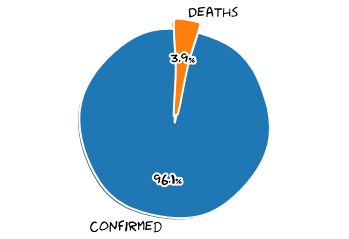

Arizona State Total Population
7171646
Arizona State Confirmed
8364 (0.1166259461217132% of population)
Arizona State Deaths
328 (3.9215686274509802% of confirmed)



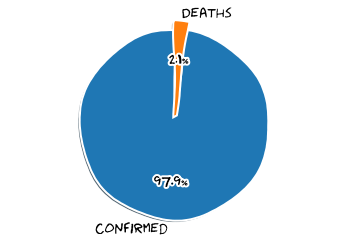

Arkansas State Total Population
3013825
Arkansas State Confirmed
3372 (0.11188439939279818% of population)
Arkansas State Deaths
72 (2.135231316725979% of confirmed)



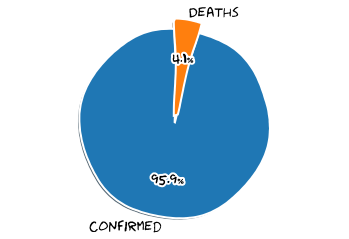

California State Total Population
39557045
California State Confirmed
53233 (0.13457274172021697% of population)
California State Deaths
2174 (4.083932898765803% of confirmed)



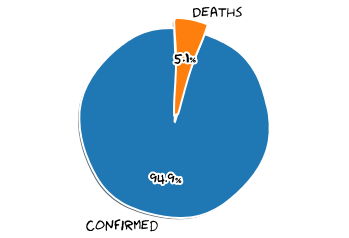

Colorado State Total Population
5695564
Colorado State Confirmed
16247 (0.28525708779674847% of population)
Colorado State Deaths
831 (5.114790422847295% of confirmed)



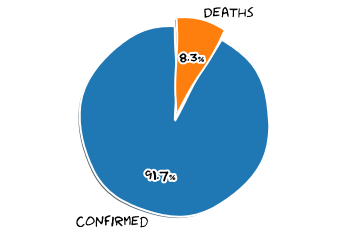

Connecticut State Total Population
3572665
Connecticut State Confirmed
29346 (0.8214036300632721% of population)
Connecticut State Deaths
2437 (8.304368568118313% of confirmed)



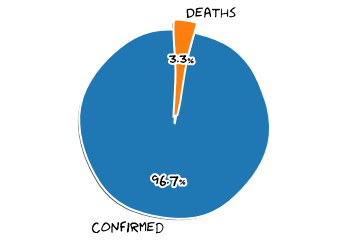

Delaware State Total Population
967171
Delaware State Confirmed
5038 (0.5209006473519161% of population)
Delaware State Deaths
168 (3.33465660976578% of confirmed)



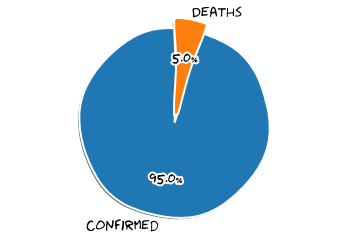

District of Columbia State Total Population
702455
District of Columbia State Confirmed
4797 (0.6828907189784399% of population)
District of Columbia State Deaths
240 (5.003126954346467% of confirmed)



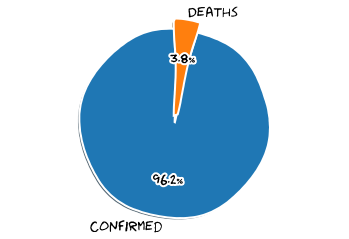

Florida State Total Population
21299325
Florida State Confirmed
35463 (0.1664982340989679% of population)
Florida State Deaths
1364 (3.8462623015537325% of confirmed)



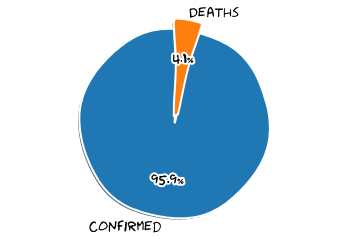

Georgia State Total Population
10519475
Georgia State Confirmed
28342 (0.2694240919817767% of population)
Georgia State Deaths
1176 (4.149319031825559% of confirmed)



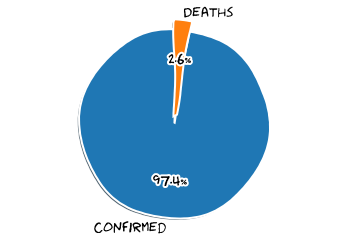

Hawaii State Total Population
1420491
Hawaii State Confirmed
620 (0.04364687984647562% of population)
Hawaii State Deaths
16 (2.5806451612903225% of confirmed)



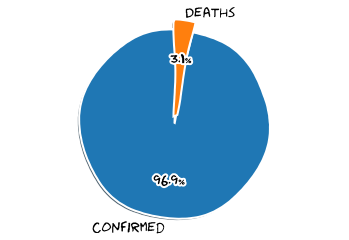

Idaho State Total Population
1754208
Idaho State Confirmed
2035 (0.11600676772651818% of population)
Idaho State Deaths
63 (3.095823095823096% of confirmed)



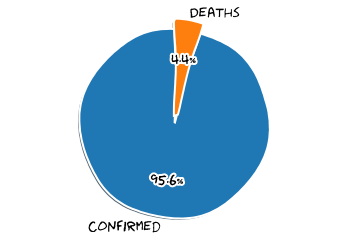

Illinois State Total Population
12741080
Illinois State Confirmed
58505 (0.45918399382155983% of population)
Illinois State Deaths
2559 (4.373985129476113% of confirmed)



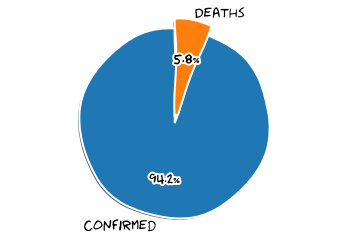

Indiana State Total Population
6691878
Indiana State Confirmed
19295 (0.28833460502418007% of population)
Indiana State Deaths
1115 (5.77869914485618% of confirmed)



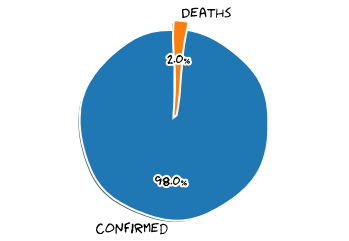

Iowa State Total Population
3156145
Iowa State Confirmed
8643 (0.27384673391114794% of population)
Iowa State Deaths
175 (2.0247599213236147% of confirmed)



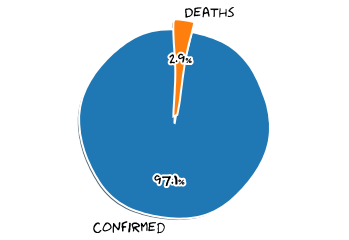

Kansas State Total Population
2911510
Kansas State Confirmed
4887 (0.16785104636425774% of population)
Kansas State Deaths
142 (2.905668099038265% of confirmed)



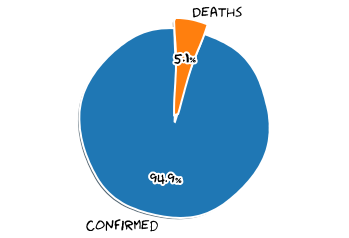

Kentucky State Total Population
4468402
Kentucky State Confirmed
4879 (0.10918892257232003% of population)
Kentucky State Deaths
248 (5.083008813281411% of confirmed)



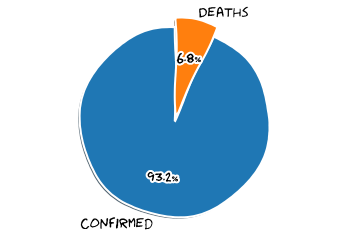

Louisiana State Total Population
4659978
Louisiana State Confirmed
29140 (0.6253248405893762% of population)
Louisiana State Deaths
1993 (6.839396019217571% of confirmed)



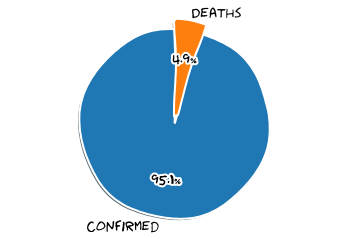

Maine State Total Population
1338404
Maine State Confirmed
1153 (0.0861473815081246% of population)
Maine State Deaths
56 (4.856895056374675% of confirmed)



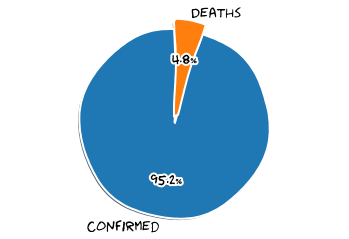

Maryland State Total Population
6042718
Maryland State Confirmed
24473 (0.4049998692641292% of population)
Maryland State Deaths
1166 (4.764434274506599% of confirmed)



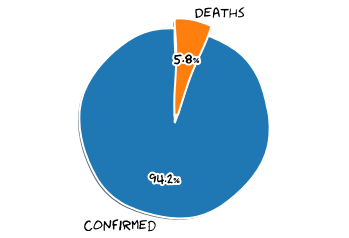

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
64311 (0.9317532843756342% of population)
Massachusetts State Deaths
3716 (5.778171696910326% of confirmed)



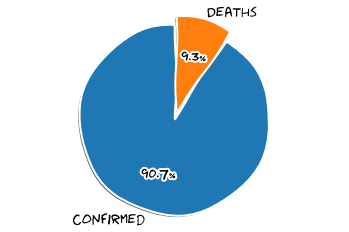

Michigan State Total Population
9995915
Michigan State Confirmed
43207 (0.4322465727249581% of population)
Michigan State Deaths
4021 (9.306362394982294% of confirmed)



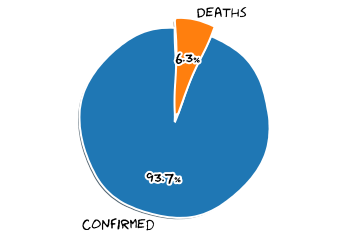

Minnesota State Total Population
5611179
Minnesota State Confirmed
6232 (0.1110640027701843% of population)
Minnesota State Deaths
394 (6.322207958921694% of confirmed)



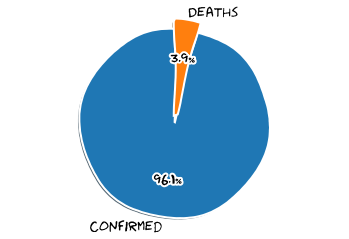

Mississippi State Total Population
2986530
Mississippi State Confirmed
7441 (0.24915202592975796% of population)
Mississippi State Deaths
291 (3.9107646821663753% of confirmed)



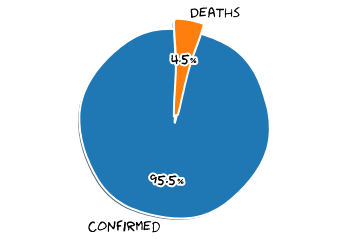

Missouri State Total Population
6126452
Missouri State Confirmed
8344 (0.13619628457058017% of population)
Missouri State Deaths
372 (4.458293384467881% of confirmed)



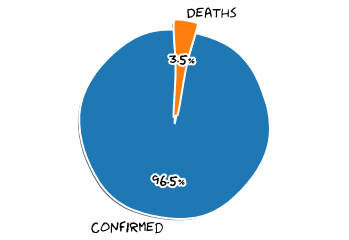

Montana State Total Population
1062305
Montana State Confirmed
455 (0.04283139023161898% of population)
Montana State Deaths
16 (3.5164835164835164% of confirmed)



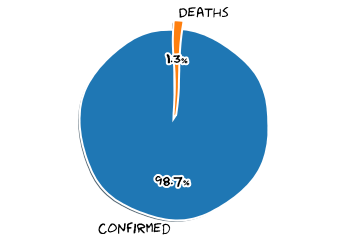

Nebraska State Total Population
1929268
Nebraska State Confirmed
5315 (0.2754930885703801% of population)
Nebraska State Deaths
67 (1.2605832549388523% of confirmed)



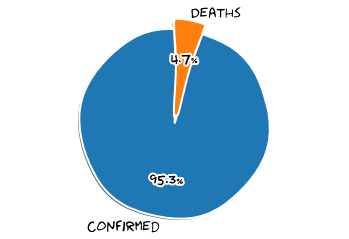

Nevada State Total Population
3034392
Nevada State Confirmed
5383 (0.17739962404330092% of population)
Nevada State Deaths
252 (4.681404421326398% of confirmed)



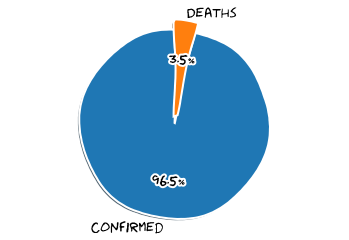

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
2310 (0.17029646328894812% of population)
New Hampshire State Deaths
81 (3.506493506493506% of confirmed)



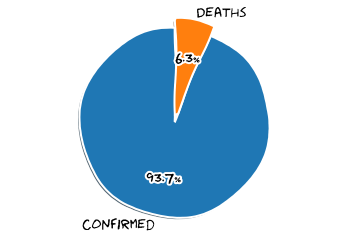

New Jersey State Total Population
8908520
New Jersey State Confirmed
123717 (1.3887491973975474% of population)
New Jersey State Deaths
7742 (6.257830370927196% of confirmed)



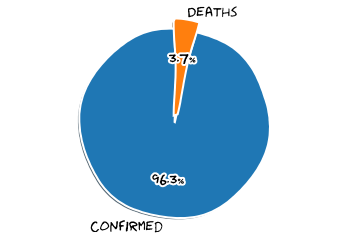

New Mexico State Total Population
2095428
New Mexico State Confirmed
3732 (0.1781020392969837% of population)
New Mexico State Deaths
138 (3.697749196141479% of confirmed)



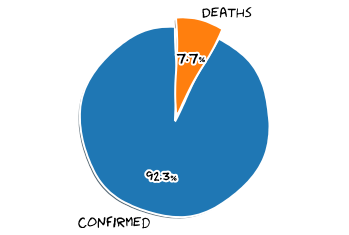

New York State Total Population
19542209
New York State Confirmed
312977 (1.6015436125977365% of population)
New York State Deaths
24198 (7.731558549030759% of confirmed)



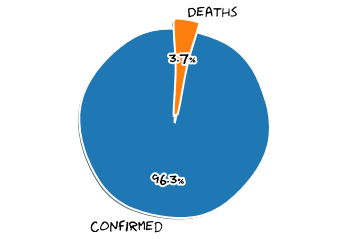

North Carolina State Total Population
10383620
North Carolina State Confirmed
11588 (0.11159884510411591% of population)
North Carolina State Deaths
431 (3.7193648602002067% of confirmed)



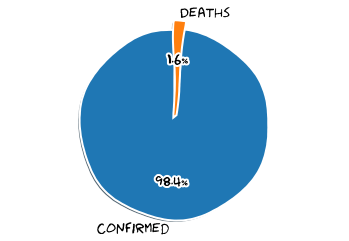

North Dakota State Total Population
760077
North Dakota State Confirmed
1153 (0.15169515720117832% of population)
North Dakota State Deaths
19 (1.647875108412836% of confirmed)



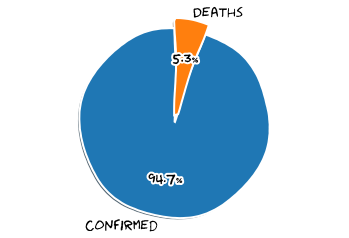

Ohio State Total Population
11689442
Ohio State Confirmed
19335 (0.165405671203125% of population)
Ohio State Deaths
1022 (5.285751228342384% of confirmed)



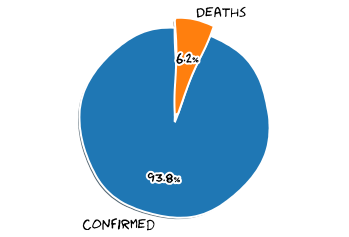

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
3851 (0.0976647944410954% of population)
Oklahoma State Deaths
238 (6.180212931706051% of confirmed)



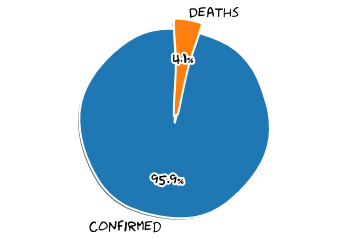

Oregon State Total Population
4190713
Oregon State Confirmed
2635 (0.06287712854590616% of population)
Oregon State Deaths
109 (4.136622390891841% of confirmed)



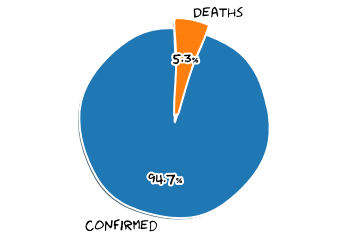

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
50494 (0.39426691215626375% of population)
Pennsylvania State Deaths
2695 (5.3372677941933695% of confirmed)



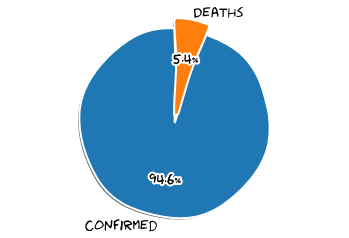

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
1757 (0.054989541971855495% of population)
Puerto Rico State Deaths
95 (5.406943653955606% of confirmed)



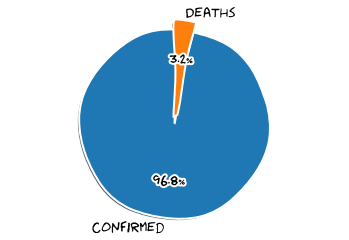

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
9289 (0.8785461286371612% of population)
Rhode Island State Deaths
296 (3.18656475401012% of confirmed)



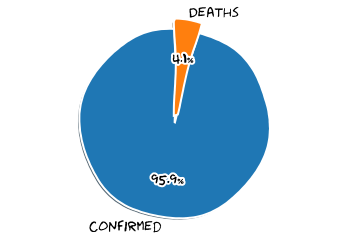

South Carolina State Total Population
5084127
South Carolina State Confirmed
6489 (0.12763253160277074% of population)
South Carolina State Deaths
267 (4.11465557096625% of confirmed)



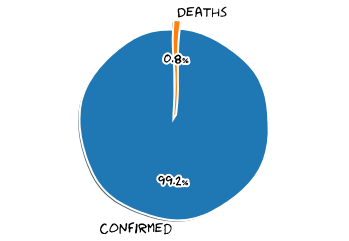

South Dakota State Total Population
882235
South Dakota State Confirmed
2588 (0.2933458772322567% of population)
South Dakota State Deaths
21 (0.8114374034003091% of confirmed)



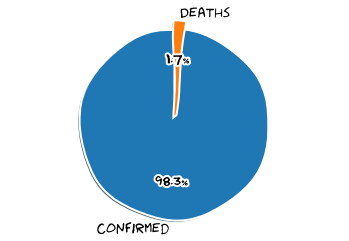

Tennessee State Total Population
6770010
Tennessee State Confirmed
12565 (0.1855979533265091% of population)
Tennessee State Deaths
209 (1.6633505769996022% of confirmed)



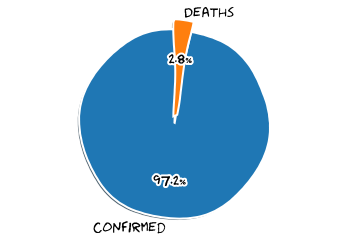

Texas State Total Population
28701845
Texas State Confirmed
30725 (0.10704886741601455% of population)
Texas State Deaths
859 (2.795768917819365% of confirmed)



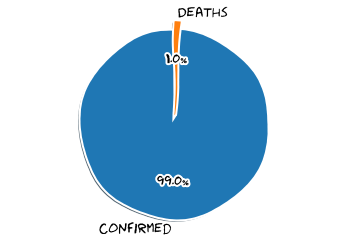

Utah State Total Population
3161105
Utah State Confirmed
4985 (0.15769802015434478% of population)
Utah State Deaths
49 (0.9829488465396189% of confirmed)



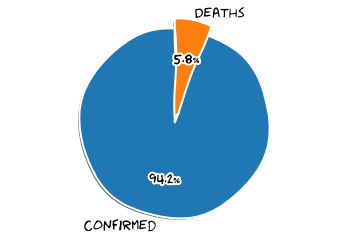

Vermont State Total Population
626299
Vermont State Confirmed
886 (0.141465977113168% of population)
Vermont State Deaths
51 (5.756207674943567% of confirmed)



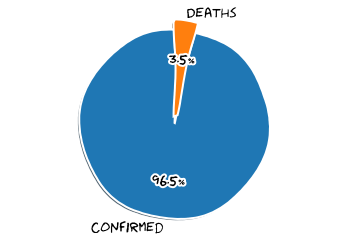

Virginia State Total Population
8517685
Virginia State Confirmed
17738 (0.20824907237119006% of population)
Virginia State Deaths
617 (3.47840793776074% of confirmed)



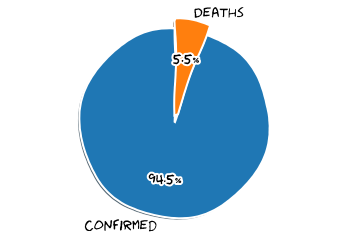

Washington State Total Population
7535591
Washington State Confirmed
15003 (0.1990952003631832% of population)
Washington State Deaths
830 (5.532226887955742% of confirmed)



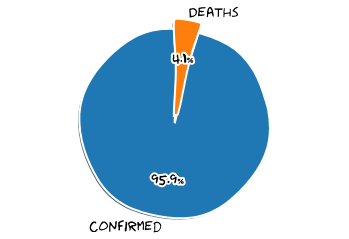

West Virginia State Total Population
1805832
West Virginia State Confirmed
1185 (0.06562072219342663% of population)
West Virginia State Deaths
48 (4.050632911392405% of confirmed)



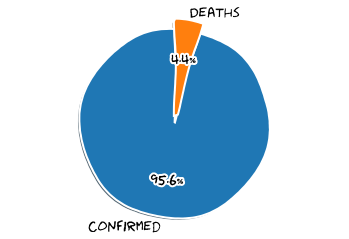

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
7660 (0.13176073626385723% of population)
Wisconsin State Deaths
334 (4.360313315926892% of confirmed)



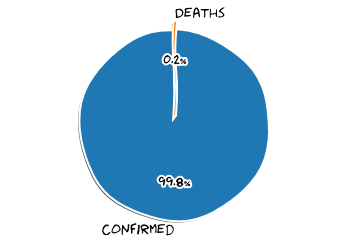

Wyoming State Total Population
577737
Wyoming State Confirmed
580 (0.10039170072195482% of population)
Wyoming State Deaths
1 (0.1724137931034483% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1130115
US Deaths
66113

New York City Confirmed
172354
New York City Deaths
18491

Philippines Confirmed
8928
Philippines Deaths
603



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 3421834},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 243524},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-02T23:32:31.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1092715},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [404]>


""


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588462351000,40.767273,-73.971526,172354,0,18491,153863,New York City,36061,"New York City, New York, US",2067.383751,None,None,84036061,USA
1,Illinois,US,1588462351000,41.841448,-87.816588,40227,0,1743,38484,Cook,17031,"Cook, Illinois, US",781.071458,None,None,84017031,USA
2,New York,US,1588462351000,40.740665,-73.589419,36519,0,1745,34774,Nassau,36059,"Nassau, New York, US",2691.307693,None,None,84036059,USA
3,New York,US,1588462351000,40.883201,-72.801217,34478,0,1227,33251,Suffolk,36103,"Suffolk, New York, US",2334.957108,None,None,84036103,USA
4,New York,US,1588462351000,41.162784,-73.757417,29626,0,1067,28559,Westchester,36119,"Westchester, New York, US",3062.099873,None,None,84036119,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Missouri,US,1588462351000,40.479456,-94.423288,1,0,0,1,Worth,29227,"Worth, Missouri, US",49.677099,None,None,84029227,USA
2859,West Virginia,US,1588462351000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2860,Texas,US,1588462351000,33.173202,-102.827643,1,0,0,1,Yoakum,48501,"Yoakum, Texas, US",11.477103,None,None,84048501,USA
2861,Alaska,US,1588462351000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588462351000,40.767273,-73.971526,172354,0,18491,153863,New York City,36061,"New York City, New York, US",2067.383751,None,None,84036061,USA
2,New York,US,1588462351000,40.740665,-73.589419,36519,0,1745,34774,Nassau,36059,"Nassau, New York, US",2691.307693,None,None,84036059,USA
3,New York,US,1588462351000,40.883201,-72.801217,34478,0,1227,33251,Suffolk,36103,"Suffolk, New York, US",2334.957108,None,None,84036103,USA
4,New York,US,1588462351000,41.162784,-73.757417,29626,0,1067,28559,Westchester,36119,"Westchester, New York, US",3062.099873,None,None,84036119,USA
17,New York,US,1588462351000,41.150279,-74.025605,11945,0,519,11426,Rockland,36087,"Rockland, New York, US",3666.483522,None,None,84036087,USA
20,New York,US,1588462351000,41.403375,-74.302408,8910,0,329,8581,Orange,36071,"Orange, New York, US",2314.646438,None,None,84036071,USA
55,New York,US,1588462351000,42.762490,-78.730637,3598,0,266,3332,Erie,36029,"Erie, New York, US",391.639509,None,None,84036029,USA
63,New York,US,1588462351000,41.764861,-73.743567,3049,0,37,3012,Dutchess,36027,"Dutchess, New York, US",1036.306412,None,None,84036027,USA
110,New York,US,1588462351000,43.146389,-77.693229,1534,0,121,1413,Monroe,36055,"Monroe, New York, US",206.802648,None,None,84036055,USA
124,New York,US,1588462351000,41.890279,-74.262521,1327,0,37,1290,Ulster,36111,"Ulster, New York, US",747.298294,None,None,84036111,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

312977

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1588462351000,40.767273,-73.971526,172354,0,18491,153863,New York City,36061,"New York City, New York, US",2067.383751,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
59,None,Philippines,1588462351000,12.879721,121.774017,8928,1124,603,7201,None,None,Philippines,8.147391,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
